### Components of Time Series:

1. TREND: A movement to higher or lower values over a longer period of time.

uptrend - upper values

downtrend, 

No trend - Horizontal or straight line.

2. SEASONALITY: The repeating patterns or cycles of behaviour over time (Fixed interval).

Ex: Sales of Mangoes in summers.

3. Noise or Irregularity or Residuals: Some random variations that no one can predict.

Ex: Floods, Stock market crashes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
df['Month'] = pd.to_datetime(df['Month'])

In [8]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [9]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [10]:
df.set_index(['Month'], inplace=True)

In [12]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


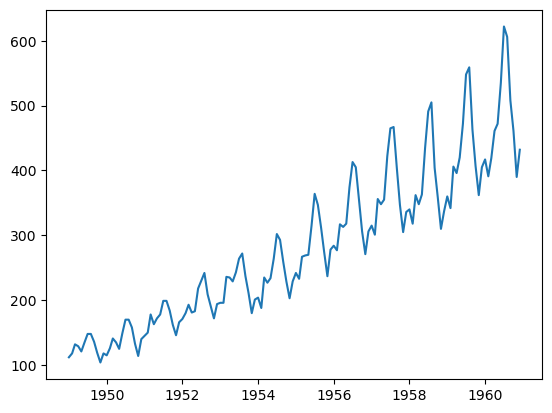

In [13]:
plt.plot(df)

Figure(640x480)


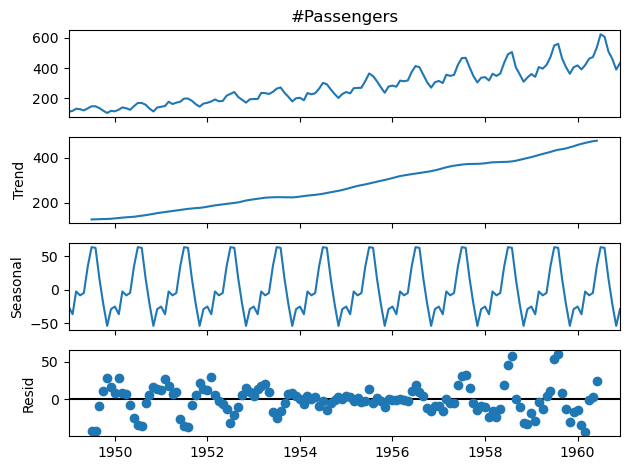

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'])
print(decomposition.plot())

In [18]:
from statsmodels.tsa.stattools import adfuller
# ad-fuller Test-
# H0(null hypothesis) = data is non stationary
# HA/H1(alternate hypothesis) = data is stationary

# if p value is more than 0.05 accept the null hypothesis

In [16]:
results = adfuller(df)
p_value = results[1] # P-value is in 1st index
p_value

0.991880243437641

In [24]:
results

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
# P-Value is greater than 0.05 so we accept NULL Hypothesis, Data is non-stationary

### Making Data Stationary:

In [20]:
# Apply Rolling mean
mean = df.rolling(window=12).mean()
std = df.rolling(window=12).std()

In [22]:
mean.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [23]:
std.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


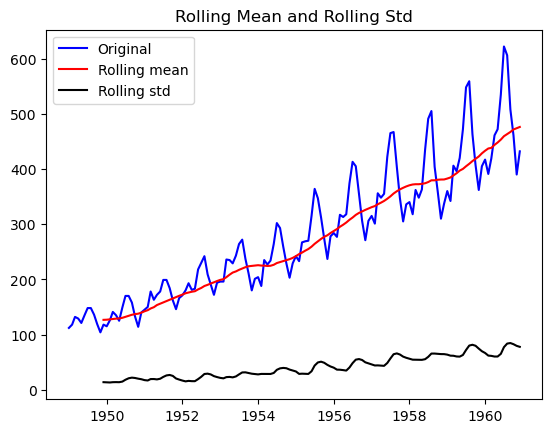

In [26]:
plt.plot(df,color='blue',label='Original')
plt.plot(mean,color='red',label='Rolling mean')
plt.plot(std,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [27]:
# Log transformation to make data stationary, it helps stabilizing variance and making the data more linear
df_log = np.log(df)
df_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [28]:
mean_log = df_log.rolling(window=12).mean()
std_log = df_log.rolling(window=12).std()

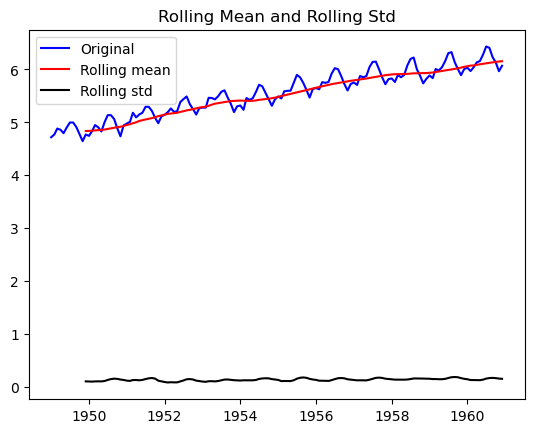

In [29]:
plt.plot(df_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [30]:
results1 = adfuller(df_log)
p_value = results1[1] # P-value is in 1st index
p_value

0.42236677477038814

In [31]:
# Again the data is not stationary -> Pvalue > 0.05

#Performing Differencing on Data to make it stationary

In [32]:
df_log['#Passengers'] = df_log['#Passengers'].diff()

In [33]:
df_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [34]:
df_log.isnull().sum()

#Passengers    1
dtype: int64

In [35]:
df_log.dropna(inplace=True)

In [36]:
mean_diff=df_log.rolling(window=12).mean()
std_diff=df_log.rolling(window=12).std()

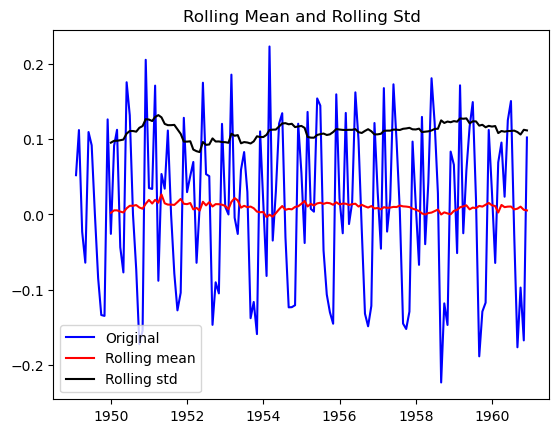

In [37]:
plt.plot(df_log,color='blue',label='Original')
plt.plot(mean_diff,color='red',label='Rolling mean')
plt.plot(std_diff,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [38]:
results2 = adfuller(df_log)
p_value = results2[1] # P-value is in 1st index
p_value

0.071120548150866

In [39]:
# Still non-stationary
df_log["#Passengers"] = df_log["#Passengers"].diff()

In [40]:
df_log

,#Passengers
Month,
1949-02-01,NaN
1949-03-01,0.059932
1949-04-01,-0.135107
1949-05-01,-0.041032
1949-06-01,0.173506
...,...
1960-08-01,-0.176733
1960-09-01,-0.150338
1960-10-01,0.079315


In [41]:
df_log.dropna(inplace=True)

In [42]:
df_log.isnull().sum()

#Passengers    0
dtype: int64

In [43]:
results3 = adfuller(df_log)
results3[1]

7.419304549375568e-13

In [44]:
# Data is now stationary

In [45]:
mean_diff=df_log.rolling(window=12).mean()
std_diff=df_log.rolling(window=12).std()

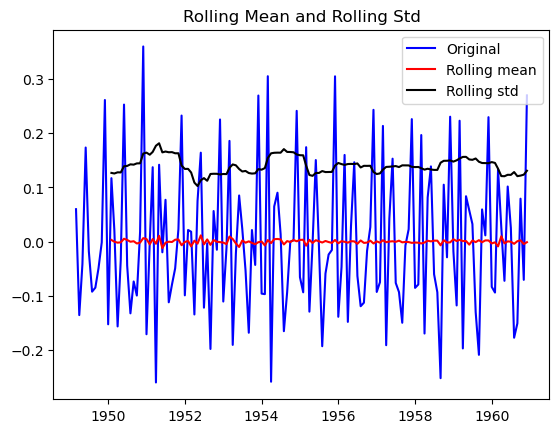

In [46]:
plt.plot(df_log,color = 'blue',label = 'Original')
plt.plot(mean_diff,color = 'red',label = 'Rolling mean')
plt.plot(std_diff,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

### Model Building:

### ARIMA:

ARIMA is a statistical model that uses the past values of a time series to predict its future values. It has three components: autoregression (AR), differencing (I), and moving average (MA).

AR component:
The autoregressive component captures the linear relationship between the current observation and
the past observations. (q)

I:
The differencing component makes stationarity in the time series. (d)

MA:
The moving average component models the error term as a linear combination of past error terms.(p)

In [48]:
# to select the optimal values of p,d,q two method :
#     PACf and ACF plots
#     tuning with itertools

In [50]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

new_data = df_log

Figure(640x480)


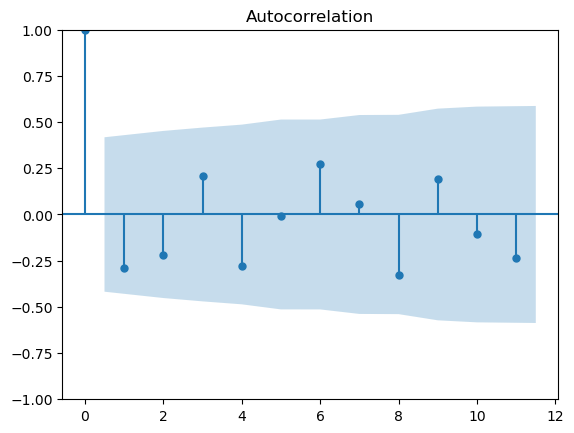

In [51]:
acf_plot = acf(new_data.dropna())
print(plot_acf(acf_plot))

In [52]:
# 1st Lag in confidence interval - q=1

Figure(640x480)


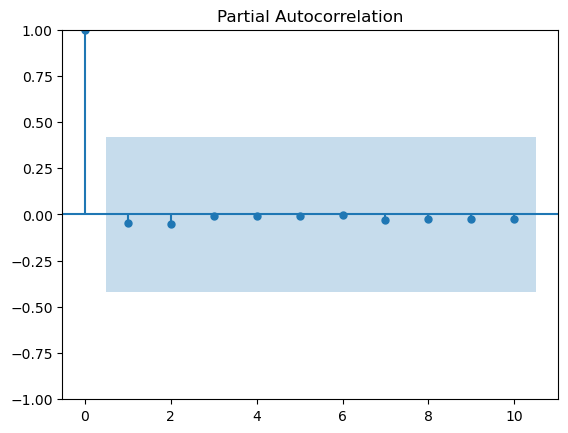

In [53]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

pacf_plot = pacf(new_data.dropna())
print(plot_pacf(pacf_plot,lags=10))

In [54]:
new_data

,#Passengers
Month,
1949-03-01,0.059932
1949-04-01,-0.135107
1949-05-01,-0.041032
1949-06-01,0.173506
1949-07-01,-0.017547
...,...
1960-08-01,-0.176733
1960-09-01,-0.150338
1960-10-01,0.079315


In [56]:
train=new_data.iloc[:120,:]["#Passengers"]
test=new_data.iloc[120:,:]["#Passengers"]

In [57]:
train

Month
1949-03-01    0.059932
1949-04-01   -0.135107
1949-05-01   -0.041032
1949-06-01    0.173506
1949-07-01   -0.017547
                ...   
1958-10-01    0.105051
1958-11-01   -0.028658
1958-12-01    0.230261
1959-01-01   -0.017490
1959-02-01   -0.117314
Name: #Passengers, Length: 120, dtype: float64

In [58]:
test

Month
1959-03-01    0.222836
1959-04-01   -0.196481
1959-05-01    0.083779
1959-06-01    0.057884
1959-07-01    0.032572
1959-08-01   -0.129422
1959-09-01   -0.208297
1959-10-01    0.059509
1959-11-01    0.011745
1959-12-01    0.229412
1960-01-01   -0.083044
1960-02-01   -0.093578
1960-03-01    0.133542
1960-04-01    0.026364
1960-05-01   -0.071946
1960-06-01    0.101707
1960-07-01    0.025386
1960-08-01   -0.176733
1960-09-01   -0.150338
1960-10-01    0.079315
1960-11-01   -0.070168
1960-12-01    0.269530
Name: #Passengers, dtype: float64

In [59]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [60]:
model = ARIMA(train, order=(1,2,1))# Random Experimentation of pq values, d= no. of times used difff

In [62]:
model = model.fit()

In [63]:
new_data['Predict'] = model.predict(start=len(train), end=len(train)+len(test)-1)

In [64]:
new_data

,#Passengers,Predict
Month,,
1949-03-01,0.059932,NaN
1949-04-01,-0.135107,NaN
1949-05-01,-0.041032,NaN
1949-06-01,0.173506,NaN
1949-07-01,-0.017547,NaN
...,...,...
1960-08-01,-0.176733,-0.094363
1960-09-01,-0.150338,-0.094997
1960-10-01,0.079315,-0.095633


<Axes: xlabel='Month'>

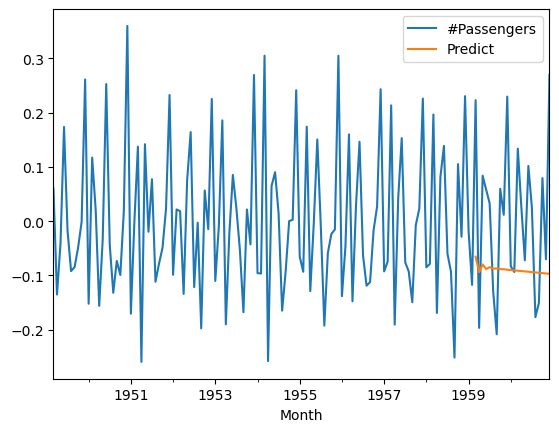

In [65]:
new_data[["#Passengers", "Predict"]].plot()

In [66]:
# we will use here itertools to get the combinations of values of p,d,q
import itertools

p=range(8)
d=range(0,2)
q=range(8)
pdq_combination=list(itertools.product(p,d,q))
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [67]:
from sklearn.metrics import mean_squared_error

In [69]:
rmse = []
order1 =[]
for pdq in pdq_combination:
    model = ARIMA(train, order = pdq)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end= len(train)+len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred)) # RMSE
    order1.append(pdq)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns=['RMSE'])

In [70]:
results

,RMSE
"(0, 0, 0)",0.135590
"(0, 0, 1)",0.132055
"(0, 0, 2)",0.134252
"(0, 0, 3)",0.132299
"(0, 0, 4)",0.134634
...,...
"(7, 1, 3)",0.113047
"(7, 1, 4)",0.110480
"(7, 1, 5)",0.095797
"(7, 1, 6)",0.105921


In [71]:
results.sort_values("RMSE")

,RMSE
"(7, 1, 7)",0.093251
"(6, 1, 7)",0.093745
"(7, 1, 5)",0.095797
"(6, 0, 7)",0.102178
"(6, 1, 6)",0.103295
...,...
"(1, 1, 6)",0.136095
"(5, 1, 0)",0.138580
"(2, 1, 7)",0.141706
"(1, 1, 0)",0.160265


<Axes: xlabel='Month'>

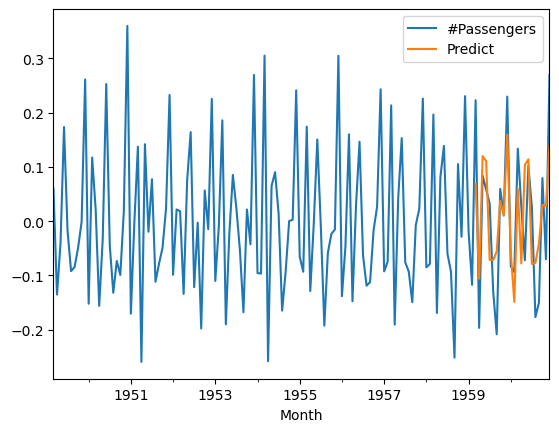

In [72]:
model = ARIMA(train, order=(7,1,7)) 
model = model.fit()
new_data['Predict'] = model.predict(start=len(train), end=len(train)+len(test)-1)
new_data[["#Passengers", "Predict"]].plot()

<Axes: xlabel='Month'>

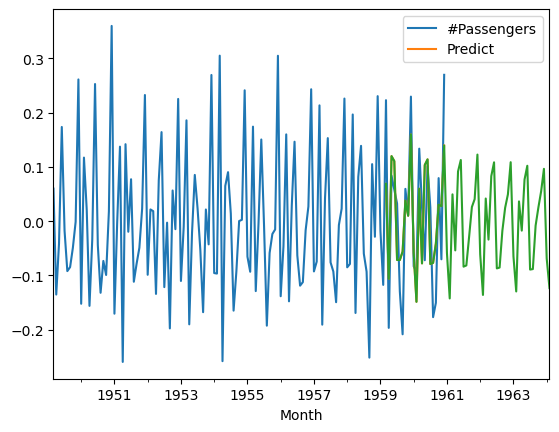

In [73]:
forecast = model.forecast(steps=60) #for predicting future
new_data.plot()
forecast.plot() # Monthly data, so 60 steps means 5 years

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(7,1,7),seasonal_order=(7,1,7,12))
model=model.fit()

<Axes: xlabel='Month'>

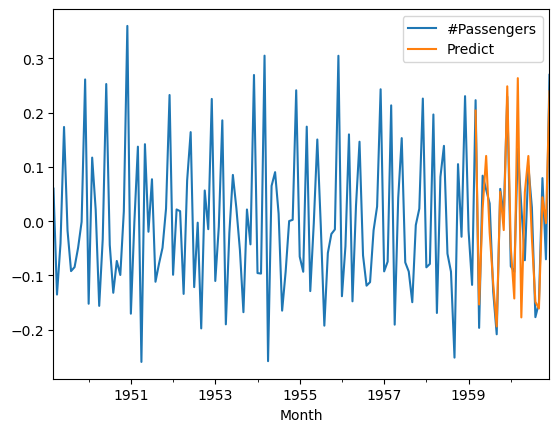

In [78]:
new_data['Predict'] = model.predict(start=len(train), end=len(train)+len(test)-1)
new_data[["#Passengers", "Predict"]].plot()

<Axes: xlabel='Month'>

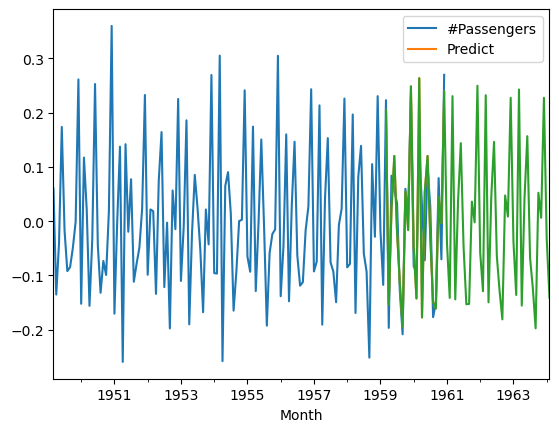

In [79]:
forecast = model.forecast(steps=60) #for predicting future
new_data.plot()
forecast.plot()